In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from Implemented_functions import *
from Data_cleaning import *
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data

In [3]:
X_train_data_full, X_test_data, Y_train_data_full, train_ids, test_ids = load_csv_data("data\dataset\dataset")
print("X_train_data shape:", X_train_data_full.shape)
print("Y_train_data shape:", Y_train_data_full.shape)
print("X_test_data shape:", X_test_data.shape)

<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\janfo\AppData\Local\Temp\ipykernel_2924\4294577664.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  X_train_data_full, X_test_data, Y_train_data_full, train_ids, test_ids = load_csv_data("data\dataset\dataset")


X_train_data shape: (328135, 321)
Y_train_data shape: (328135,)
X_test_data shape: (109379, 321)


In [4]:
print("Number of -1 labels in Y_train_data:", np.sum(Y_train_data_full == -1))
print("Number of 1 labels in Y_train_data:", np.sum(Y_train_data_full == 1))
Y_train_data_norm_full = np.where(Y_train_data_full == -1, 0, Y_train_data_full)
print("Number of -1 labels in Y_train_data_norm:", np.sum(Y_train_data_norm_full == -1))

X_train_data, Y_train_data = X_train_data_full, Y_train_data_norm_full

Number of -1 labels in Y_train_data: 299160
Number of 1 labels in Y_train_data: 28975
Number of -1 labels in Y_train_data_norm: 0


In [5]:
"Run if needed to reduce dataset size for faster testing"
# X_train_data, Y_train_data = X_train_data_full[:10000], Y_train_data_norm_full[:10000]
print("Reduced X_train_data shape:", X_train_data.shape)
print("Reduced Y_train_data shape:", Y_train_data.shape)

Reduced X_train_data shape: (328135, 321)
Reduced Y_train_data shape: (328135,)


# Ridge Regression, Model selection and regularization
In this model script, as we already explored some data preprocessing mesures, we will try to find which is the best model to use. Morover, we will dicuss if regularization is needed and, in case it is, the best way to do so.

# Best Logistic Regularization
In this section we will explore the different values for the lambda parameter for the logistic model. From now, we will consider the preprocessing data fixed, as we ended the Model_I script: standardize, more than 75% NaN features removed, balancing (turn data into 50 % for each label) and NaN substitution by the mean. 

In [6]:
# Preprocessing

def preprocessing(x_train, x_val, y_train, y_val, threshold=0.75): # fix 75%
    
    # remove features that contain NaN values in the training set
    x_train, keep_mask = remove_nan_features(x_train, threshold=threshold) # we remove features with more than 30% NaN values
    x_val = x_val[:, keep_mask]
    # replace missing values with mean and standardize features
    x_train = impute_missing_values(x_train, strategy='mean')
    x_val = impute_missing_values(x_val, strategy='mean')
    x_train, means, stds = standardize_features(x_train)
    x_val = (x_val - means) / stds
    # balance data by undersampling, so that both classes have the same number of samples
    x_train, y_train = balance_data(x_train, y_train, method='undersample')
    print("Number of removes features due to NaN values:", np.sum(~keep_mask))
    return x_train, x_val, y_train, y_val

First we try some lambdas and plot the learning curve to capture the behaviour. 

In [ ]:
# This cell takes a lot of time to run. Better to skip it and run the next one to load the stored results

m = X_train_data.shape[0] // 5
X_train_over, X_val_over = X_train_data[m:], X_train_data[:m]
Y_train_over, Y_val_over = Y_train_data[m:], Y_train_data[:m]


lambdas = [0., 1e-6, 1e-3, 1.]
train_losses_lambdas, val_losses_lambdas, f1s_lambdas = [], [], []

for lambda_ in lambdas:

    def train_method(y, x):  
        return logistic_regression_penalized_gradient_descent(y, x, gamma = 0.5, lambda_ =lambda_)
    def evaluator(y, x, w):
        return evaluate_logistic_model(y, x, w, threshold=0.7, lambda_ = lambda_) # we saw in Model_I that 0.7 was the best for this preprocess

    train_losses, val_losses, f1s_datasize = over_under_fitting(
        X_train_over, 
        X_val_over, 
        Y_train_over, 
        Y_val_over, 
        train_method = train_method, 
        evaluator = evaluator, preprocess=preprocessing, steps = 20)
    train_losses_lambdas.append(train_losses)
    val_losses_lambdas.append(val_losses)
    f1s_lambdas.append(f1s_datasize)
    print("For lambda:", lambda_, "best f1:", max(f1s_datasize))

Before preprocess (262508, 321) (262508,)
Number of removes features due to NaN values: 117
After preprocess (46564, 204) (46564,)
Iteration     0, loss = 0.693147
Iteration   100, loss = 0.480552
Iteration   200, loss = 0.479520
Iteration   300, loss = 0.479194
Iteration   400, loss = 0.479010
Iteration   500, loss = 0.478884
Iteration   600, loss = 0.478790
Iteration   700, loss = 0.478714
Iteration   800, loss = 0.478651
Iteration   900, loss = 0.478597
Iteration  1000, loss = 0.478550
Iteration  1100, loss = 0.478507
Iteration  1200, loss = 0.478469
Iteration  1300, loss = 0.478435
Iteration  1400, loss = 0.478403
Iteration  1500, loss = 0.478374
Iteration  1600, loss = 0.478348
Iteration  1700, loss = 0.478323
Iteration  1800, loss = 0.478300
Iteration  1900, loss = 0.478278
Iteration  2000, loss = 0.478258
Iteration  2100, loss = 0.478239
Iteration  2200, loss = 0.478221
Iteration  2300, loss = 0.478204
Iteration  2400, loss = 0.478189
Iteration  2500, loss = 0.478174
Iteration  

In [ ]:
# code to save the results of the exploration 

""""
print(train_losses_lambdas, val_losses_lambdas, f1s_datasize)

l1 = np.array(train_losses_lambdas)
l2 = np.array(val_losses_lambdas)
l3 = np.array(f1s_lambdas)

np.savez('LearningCurveArrays.npz', a=l1, b=l2, c=l3)
"""

[[0.47782293775991824, 0.47698732355355455, 0.4769797667913417, 0.4770039175573837, 0.47681266868960714, 0.4773146148510138, 0.47865607094187657, 0.4796717078395382, 0.4782240867822293, 0.47912594239435036, 0.47835353433693933, 0.479596962621177, 0.4779949204257517, 0.4765741103326543, 0.47627971060157254, 0.4765373725837642, 0.4765373725837642, 0.4765373725837642, 0.4765373725837642, 0.4765373725837642], [0.46913751205520937, 0.46864342411863963, 0.46933432814373377, 0.46957572959533184, 0.47013088621710947, 0.47271475825321124, 0.4726492327593902, 0.47231070965972555, 0.4732384067332979, 0.4731435062442052, 0.47239630488329915, 0.471653605361771, 0.4740681027608305, 0.4742306367302612, 0.4742400949416812, 0.47425435810150346, 0.47425435810150346, 0.47425435810150346, 0.47425435810150346, 0.47425435810150346], [0.4677932052993417, 0.46926186000038683, 0.469717432554358, 0.47062807892668707, 0.47090624003003345, 0.47217401655926633, 0.4722353018003547, 0.4725857994053359, 0.47421844351

In [ ]:
# Run this to get the results loaded

lambdas = [0., 1e-6, 1e-3, 1.]

data = np.load('LearningCurveArrays.npz')
l1_loaded = data['a']
l2_loaded = data['b']
l3_loaded = data['c']

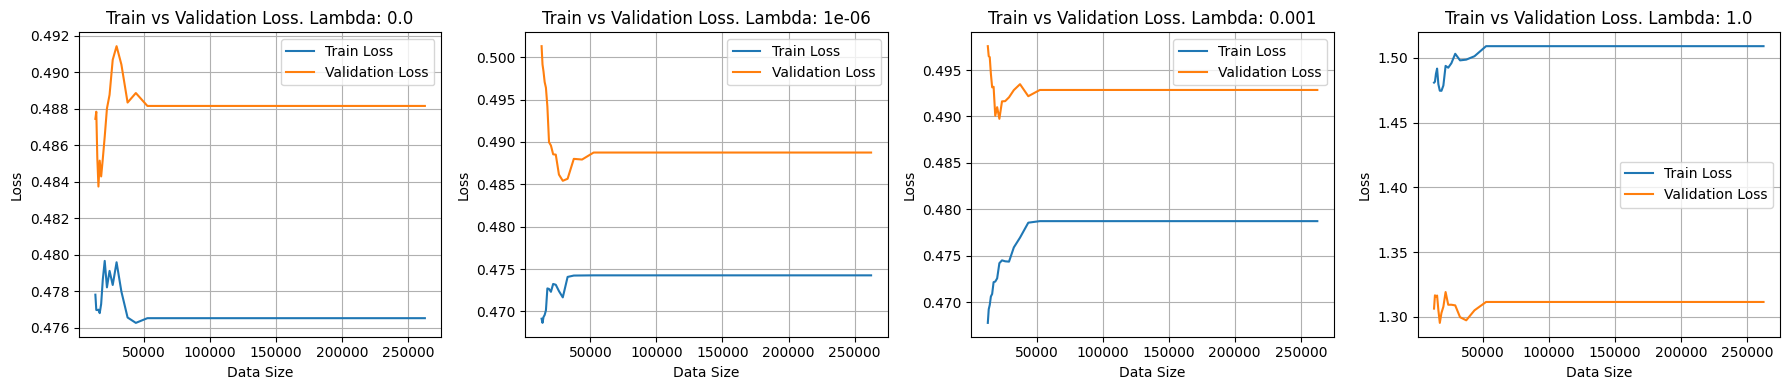

In [25]:
# Plot the results for the losses

N = X_train_over.shape[0]
data_sizes = np.array([N / (len(l1_loaded[0]) - i) for i in range(len(l1_loaded[0]))])

fig, axs = plt.subplots(1, len(lambdas), figsize=(18, 4)) 

for i in range(len(lambdas)):

    axs[i].plot(data_sizes, l1_loaded[i], label='Train Loss')
    axs[i].plot(data_sizes, l2_loaded[i], label='Validation Loss')
    axs[i].set_title(f'Train vs Validation Loss. Lambda: {lambdas[i]}')
    axs[i].set_ylabel('Loss')
    axs[i].set_xlabel('Data Size')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

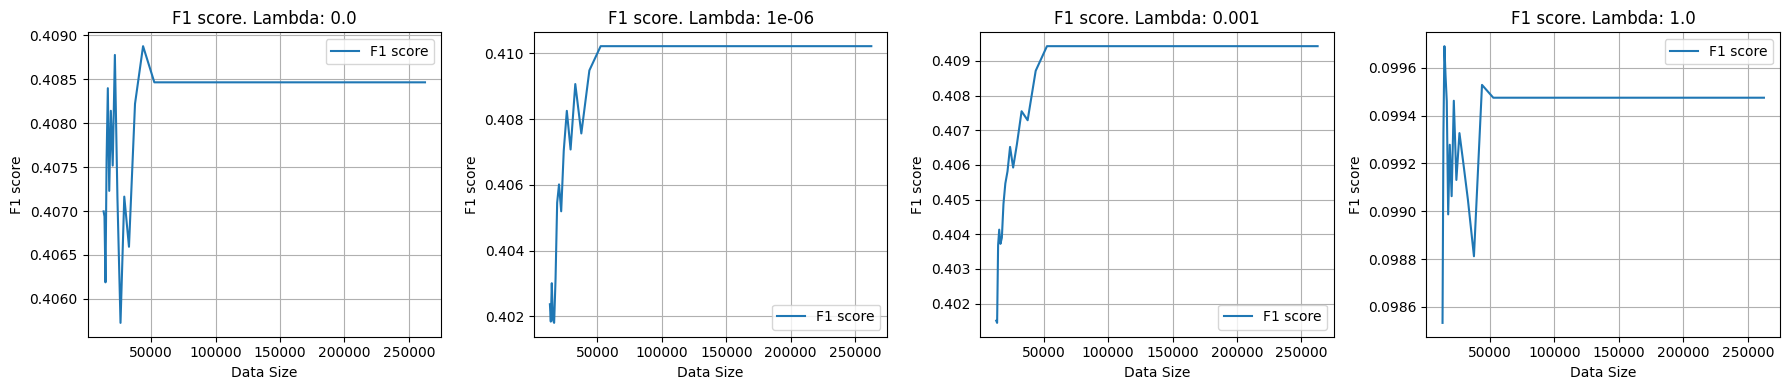

In [26]:
# Plot for the F1 scores

N = X_train_over.shape[0]
data_sizes = np.array([N / (len(l1_loaded[0]) - i) for i in range(len(l1_loaded[0]))])

fig, axs = plt.subplots(1, len(lambdas), figsize=(18, 4)) 

for i in range(len(lambdas)):

    axs[i].plot(data_sizes, l3_loaded[i], label='F1 score')
    axs[i].set_xlabel('Data Size')
    axs[i].set_ylabel('F1 score')
    axs[i].set_title(f'F1 score. Lambda: {lambdas[i]}')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


In [31]:
# Print a summary
N = X_train_over.shape[0]
data_sizes = np.array([N / (len(l1_loaded[0]) - i) for i in range(len(l1_loaded[0]))])


print("Summary")
for i in range(len(lambdas)):
    print("For lambda", lambdas[i], "best F1 score:", np.max(l3_loaded[i]), "in iteration", data_sizes[np.argmax(l3_loaded[i])])

Summary
For lambda 0.0 best F1 score: 0.40887835899993713 in iteration 43751.333333333336
For lambda 1e-06 best F1 score: 0.41022142281213125 in iteration 52501.6
For lambda 0.001 best F1 score: 0.4094252586959227 in iteration 52501.6
For lambda 1.0 best F1 score: 0.09969056908381495 in iteration 14583.777777777777
